Loading in the data and taking an intial look at the first 3 rows of data. 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('https://storage.googleapis.com/hk1159/COVID_data.csv')
df.head(3)

,row_id,code,country,region_code,region,wave,month,year,indicator_topic,indicator,...,measure_type,GDP_pc,ln_GDP_pc,many_waves,weight_type,footnote,survey_producer,survey_link,last_updated,source
0,1,AFG,Afghanistan,SAR,South Asia,WAVE1,9.0,2020,Demographic,Demo_educ1,...,p,2065.0,8.0,0,Individual weight,NaN,NaN,NaN,03/8/2022 16:44PM,High Frequency Phone Survey
1,2,AFG,Afghanistan,SAR,South Asia,WAVE1,9.0,2020,Demographic,Demo_educ2,...,p,2065.0,8.0,0,Individual weight,(*) the category includes incomplete and compl...,NaN,NaN,03/8/2022 16:44PM,High Frequency Phone Survey
2,3,AFG,Afghanistan,SAR,South Asia,WAVE1,9.0,2020,Demographic,Demo_educ3,...,p,2065.0,8.0,0,Individual weight,(*) the category includes incomplete and compl...,NaN,NaN,03/8/2022 16:44PM,High Frequency Phone Survey


Checking the types of the columns to see what columns are comparable.

In [57]:
df.dtypes

row_id                     int64
code                      object
country                   object
region_code               object
region                    object
wave                      object
month                    float64
year                       int64
indicator_topic           object
indicator                 object
indicator_description     object
indicator_display         object
indicator_val            float64
urban_rural               object
industry                  object
sample_subset              int64
sample_total             float64
FCS                       object
income_group              object
lending_category          object
unit_measure              object
measure_type              object
GDP_pc                   float64
ln_GDP_pc                float64
many_waves                 int64
weight_type               object
footnote                  object
survey_producer           object
survey_link               object
last_updated              object
source    

Looking at the sumary statistics for all numeric variables.


In [ ]:
df.describe()

Trying to find some correlations in the float variables to make life easier. Not seeing much.

[Text(0.5, 1.0, 'Correlation Matrix of All Numerical Variables in Data Set')]

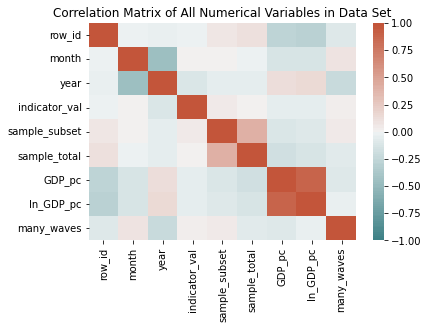

In [55]:
corr = pd.DataFrame(df).corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 20, n=100)).set(title="Correlation Matrix of All Numerical Variables in Data Set")

Looking at the correlation between all numeric variables, but there's not many interesting combinations. So I decided to plot GDP_pc vs. Sample total which showed a slight negative correlation above.

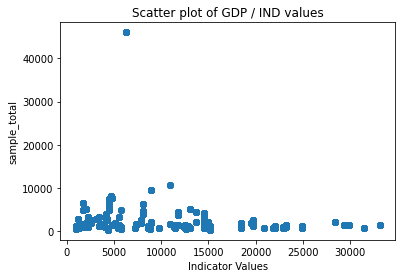

In [58]:
plt.title('Scatter plot of GDP / IND values')
plt.ylabel("sample_total")
plt.xlabel("Indicator Values")
plt.scatter(df.GDP_pc, df.sample_total)

Looking at the count of rows by region.

In [59]:
df['region'].value_counts()

Sub-Saharan Africa            49256
Latin America & Caribbean     41156
East Asia & Pacific           16741
Europe & Central Asia         10157
Middle East & North Africa     5278
South Asia                      267
Name: region, dtype: int64

Wanted to look at amount of countries in the datatset after seeing the regions.

In [60]:
print(df['country'].unique())

['Afghanistan' 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Belize' 'Bolivia' 'Brazil' 'Bhutan'
 'Central African Republic (Bangui/Bimbo)' 'Central African Republic'
 'Chile' 'Congo, Dem. Rep. (Kinshasa)' 'Congo, Rep.' 'Colombia'
 'Costa Rica' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Ethiopia' 'Gabon' 'Georgia' 'Ghana' 'Guinea' 'Gambia, The' 'Guatemala'
 'Guyana' 'Honduras' 'Croatia' 'Haiti' 'Indonesia' 'Iraq' 'Jamaica'
 'Kenya' 'Cambodia' 'Lao PDR' 'Lebanon' 'Libya' 'St. Lucia' 'Sri Lanka'
 'Madagascar' 'Maldives' 'Mexico' 'Mali' 'Myanmar' 'Mongolia'
 'Mozambique (urban)' 'Mauritius' 'Malawi' 'Malaysia' 'Nigeria'
 'Nicaragua' 'Nepal' 'Pakistan' 'Panama' 'Peru' 'Philippines'
 'Papua New Guinea' 'Poland' 'Paraguay' 'West Bank and Gaza' 'Romania'
 'Rwanda' 'Sudan' 'Senegal' 'Solomon Islands' 'Sierra Leone' 'El Salvador'
 'Somalia' 'South Sudan' 'São Tomé and Principe' 'Chad' 'Thailand'
 'Tajikistan' 'Tunisia' 'Uganda' 'Uruguay' 'Uzbek

Looking to see what months have the most data. Could tell us when data is collected the most or when there are more incidents of certain things. In other words can show intiate bias in the data (e.g. food is more insecure in the winter, so food security measures are less accurate in June which is the most volume in this chart)

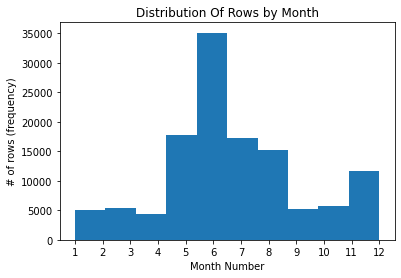

In [61]:
plt.hist(df.month.dropna())
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Distribution Of Rows by Month')
plt.xlabel("Month Number")
plt.ylabel("# of rows (frequency)")
plt.show()

Looking at distribution of GDP to see what the common range is for the countries in the dataset.

Text(0, 0.5, 'GDP')

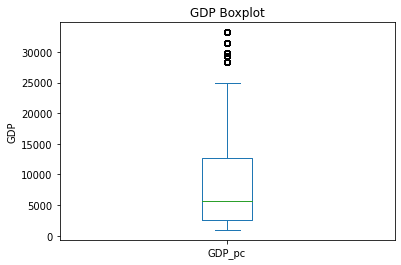

In [62]:
df["GDP_pc"].plot.box()
plt.title("GDP Boxplot")
plt.ylabel("GDP")

Looking at distribution of income groups in the data set to get a better feel of the population that we are looking at.

Text(0.5, 1.0, 'Income Group Mix')

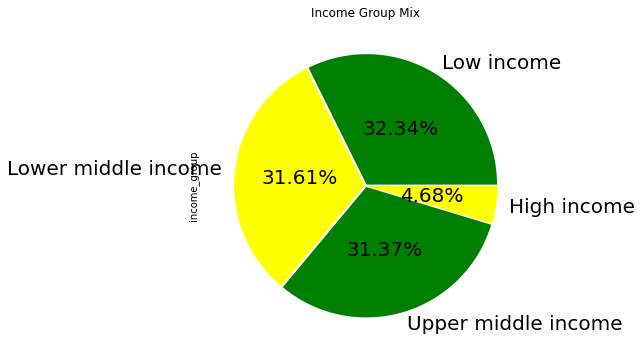

In [63]:
separate = [0.01, 0.01,0.01,0.01]
pie = df['income_group'].value_counts().plot.pie(explode=separate, colors=['green','yellow'],
                                     autopct=(lambda p : '{:.2f}%'.format(p)),
                                     fontsize=20, pctdistance=0.5,
                                     figsize=(6, 6))
plt.title("Income Group Mix")

Combining the two above ideas to look at the distribtuion of income groups in each month to see if they are different month to month.

Text(0, 0.5, 'Month Number')

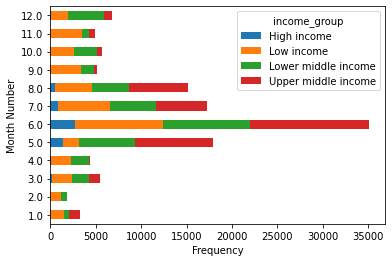

In [64]:

unstacked = df.groupby(['month', 'income_group']).size().unstack()
unstacked.plot(kind='barh', stacked=True)
plt.xlabel("Frequency")
plt.ylabel("Month Number")
plt.title("Volume by Month Colored by Income Group")

Looking at a frequency table of the above graph to notice trends more clearly. It does appear that there is a weathering effect in when the data is collected. As there is more data for the summer months than other months. Upper middle income seems especially sensitive to this as it goes from almost no data in months like February to the highest count of units in June.


In [53]:
Freq_table = pd.crosstab(index=df['month'], 
	                       columns=df['income_group'],
	                             margins=True)   
Freq_table.columns = ["High income" , "Low income" , "Lower middle income" , "Upper middle income" ,"rowtotal"]
Freq_table.index= ['1','2','3','4','5','6','7','8','9','10','11','12',"coltotal"]
Freq_table

,High income,Low income,Lower middle income,Upper middle income,rowtotal
1,0,1480,586,1149,3215
2,0,1217,639,4,1860
3,147,2270,1871,1185,5473
4,90,2221,1984,88,4383
5,1380,1739,6199,8533,17851
6,2723,9651,9605,13142,35121
7,777,5810,5078,5554,17219
8,551,4053,4099,6489,15192
9,0,3389,1441,343,5173
10,0,2592,2580,495,5667


# CONCLUSION

What I have found is that the data is heavily weighted to the summer months and this might have an effect on what income groups are being surveyed. My theory is that it is just easier to survey during warmer months, so this is why there is more data in these months.